# 1. find the outliers with pre-trained Models - ResNet50, InceptionV3 and InceptionResNetV2  2.get the union of them  3.replace them with other 'good' samples

In [87]:
import numpy as np
from tqdm import tqdm
import cv2
import pandas as pd
import os
from IPython.display import display
import matplotlib.pyplot as plt 
from keras.preprocessing import image
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# config dogs and cats classes for imagenet

In [88]:
dogs = ['n02085620','n02085782','n02085936','n02086079','n02086240','n02086646','n02086910','n02087046'
,'n02087394','n02088094','n02088238','n02088364','n02088466','n02088632','n02089078','n02089867'
,'n02089973','n02090379','n02090622','n02090721','n02091032','n02091134','n02091244','n02091467'
,'n02091635','n02091831','n02092002','n02092339','n02093256','n02093428','n02093647','n02093754'
,'n02093859','n02093991','n02094114','n02094258','n02094433','n02095314','n02095570','n02095889'
,'n02096051','n02096177','n02096294','n02096437','n02096585','n02097047','n02097130','n02097209'
,'n02097298','n02097474','n02097658','n02098105','n02098286','n02098413','n02099267','n02099429'
,'n02099601','n02099712','n02099849','n02100236','n02100583','n02100735','n02100877','n02101006'
,'n02101388','n02101556','n02102040','n02102177','n02102318','n02102480','n02102973','n02104029'
,'n02104365','n02105056','n02105162','n02105251','n02105412','n02105505','n02105641','n02105855'
,'n02106030','n02106166','n02106382','n02106550','n02106662','n02107142','n02107312','n02107574'
,'n02107683','n02107908','n02108000','n02108089','n02108422','n02108551','n02108915','n02109047'
,'n02109525','n02109961','n02110063','n02110185','n02110341','n02110627','n02110806','n02110958'
,'n02111129','n02111277','n02111500','n02111889','n02112018','n02112137','n02112350','n02112706'
,'n02113023','n02113186','n02113624','n02113712','n02113799','n02113978']

cats=['n02123045','n02123159','n02123394','n02123597','n02124075','n02125311','n02127052']

# filenames

In [89]:
sampleNumber = 500

catFilenames = ['cat.%d.jpg' %x for x in range(sampleNumber)]
dogFilenames = ['dog.%d.jpg' %x for x in range(sampleNumber)]

# ResNet50

In [90]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as piResNet50
from keras.applications.resnet50 import decode_predictions as dpResNet50
import numpy as np

modelResNet50 = ResNet50(weights='imagenet')


In [91]:

def getOutliers(model, preprocessInput, decodePredictions, catFilenames, dogFilenames, path, imageSize, topN):
    outliers = []
    for filename in catFilenames:
        img = image.load_img(path + filename, target_size=(imageSize, imageSize))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocessInput(x)

        preds = model.predict(x)

        tops = decodePredictions(preds, top=topN)[0]
        classes = [x[0] for x in tops]

        intersection = list(set(classes).intersection(set(cats)))
        if (len(intersection) is 0):
            outliers.append(filename)

    for filename in dogFilenames:
        img = image.load_img(path + filename, target_size=(imageSize, imageSize))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocessInput(x)

        preds = model.predict(x)

        tops = decodePredictions(preds, top=topN)[0]
        classes = [x[0] for x in tops]

        intersection = list(set(classes).intersection(set(dogs)))
        if (len(intersection) is 0):
            outliers.append(filename)
            
    return outliers

            

In [92]:
outliersResNet50 = getOutliers(modelResNet50, piResNet50, dpResNet50, catFilenames, dogFilenames, 'train/', 224, 100)
print (outliersResNet50)

['cat.252.jpg', 'cat.372.jpg']


In [93]:

def showOutliers(outliers, title):
    nColumn = 4
    nRow = np.ceil(len(outliers) / nColumn)

    index = 0
    fig = plt.figure(figsize=(12, 8))
    fig.suptitle(title)
    
    for filename in outliers:
        index += 1
        ax = fig.add_subplot(nRow, nColumn, index)
        ax.set_title(filename)
        img = image.load_img('train/' + filename, target_size=(224, 224))
        ax.imshow(img)


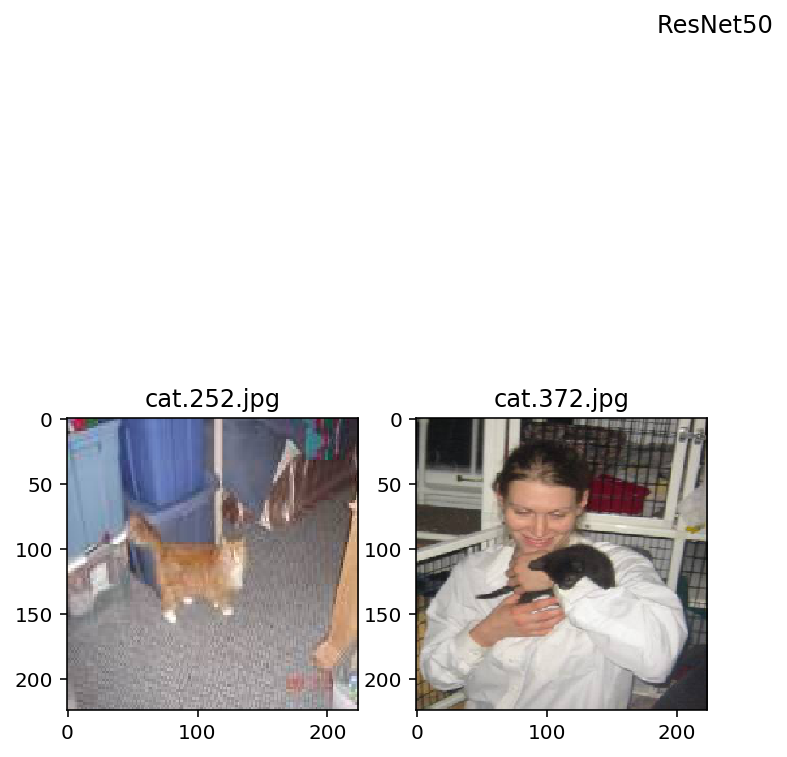

In [94]:

showOutliers(outliersResNet50, 'ResNet50')

# InceptoinV3

In [95]:
from keras.layers import Lambda
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import decode_predictions as dpInceptionV3
from keras.applications.inception_v3 import preprocess_input as piInceptionV3
 
modelInceptionV3 = InceptionV3(weights='imagenet')


['cat.252.jpg', 'cat.335.jpg']


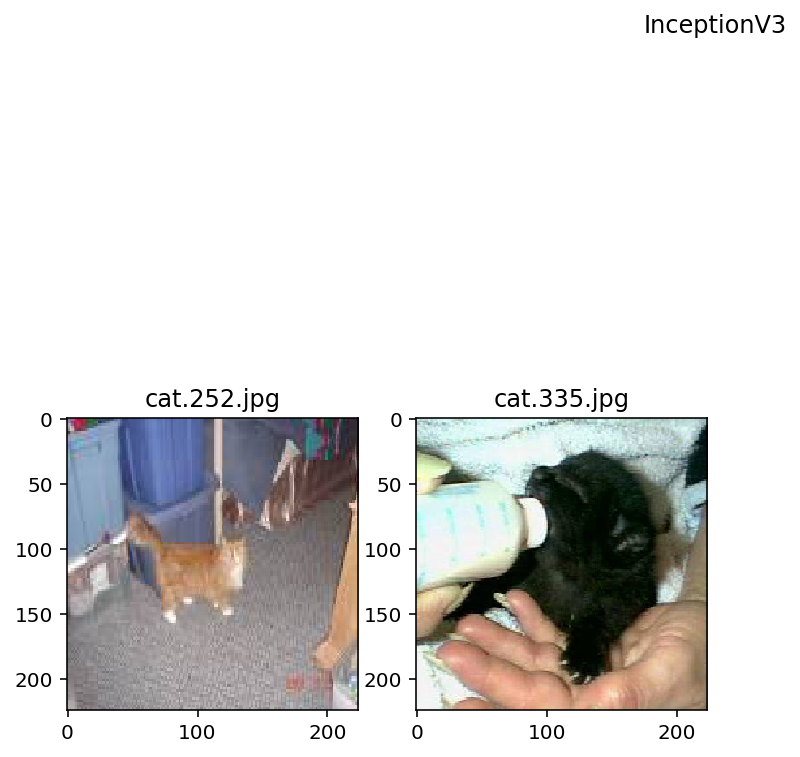

In [96]:
outliersInceptionV3 = getOutliers(modelInceptionV3, piInceptionV3, dpInceptionV3, catFilenames, dogFilenames, 'train/', 299, 100)
print (outliersInceptionV3)
showOutliers(outliersInceptionV3, 'InceptionV3')

# InceptionResNetV2

In [97]:

from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input as piInceptionResNetV2
from keras.applications.inception_resnet_v2 import decode_predictions as dpInceptionResNetV2

modelInceptionResNetV2 = InceptionResNetV2(weights='imagenet')

In [98]:
outliersInceptionResNetV2 = getOutliers(modelInceptionResNetV2, piInceptionResNetV2, dpInceptionResNetV2, catFilenames, dogFilenames, 'train/', 299, 100)
print (outliersInceptionResNetV2)
showOutliers(outliersInceptionResNetV2, 'InceptionResNetV2')

[]


# Union

['cat.252.jpg', 'cat.372.jpg', 'cat.335.jpg']


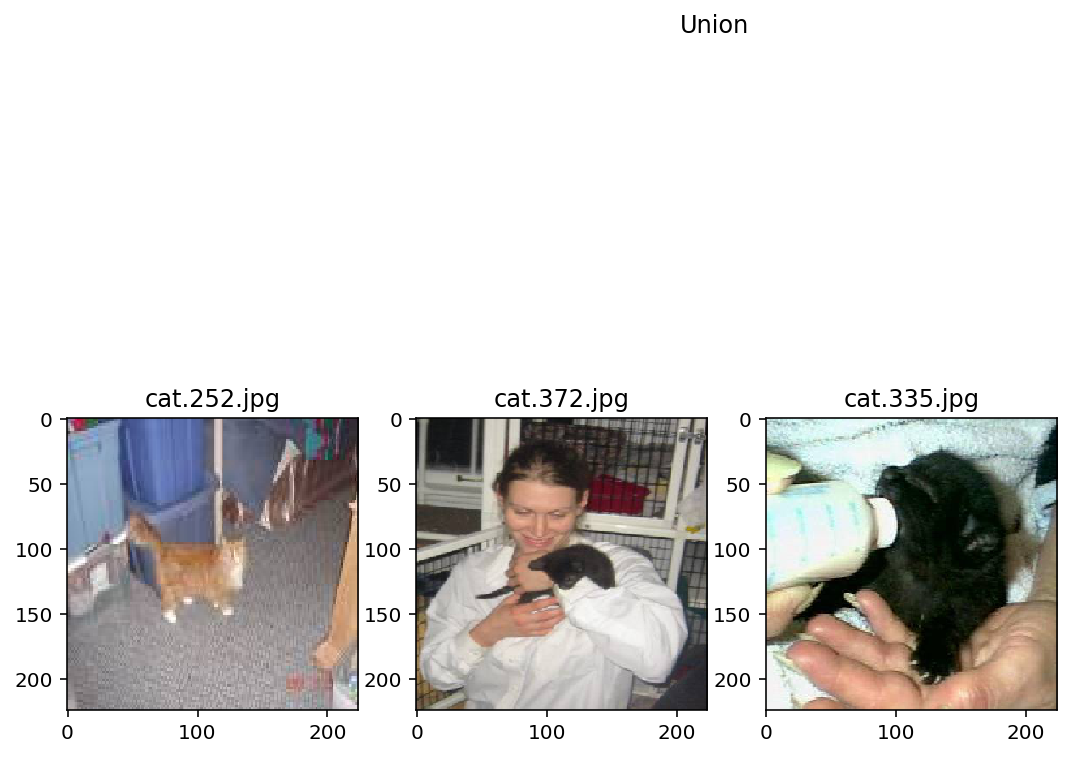

In [99]:
outliers = list(set(outliersResNet50).union(set(outliersInceptionV3)).union(set(outliersInceptionResNetV2)))
print (outliers)
showOutliers(outliers, 'Union')

# save to h5

In [100]:
import h5py

outliersFilename = "outliers.h5"
dt = h5py.special_dtype(vlen=str)
outliersArray = np.array(outliers)

with h5py.File(outliersFilename, 'w') as h:
        ds = h.create_dataset("outliers", outliersArray.shape, dtype=dt)
        ds[:] = outliersArray

In [101]:
outliers = []
with h5py.File(outliersFilename, 'r') as h:
    outliers.append(np.array(h['outliers']))

outliers = outliers[0]

In [102]:
print (outliers)

['cat.252.jpg' 'cat.372.jpg' 'cat.335.jpg']


# replace these outliers with other "good" samples

In [103]:
def getAGoodOne(total, outliersIndex):
    goodOne =  np.random.randint(0, total)
    while goodOne in outliersIndex:
        goodOne = np.random.randint(0, total)
#         print (goodOne)
        
    return goodOne

[]
[]
[252, 372, 335]
[200, 409, 225]
[]
['cat.200.jpg', 'cat.409.jpg', 'cat.225.jpg']


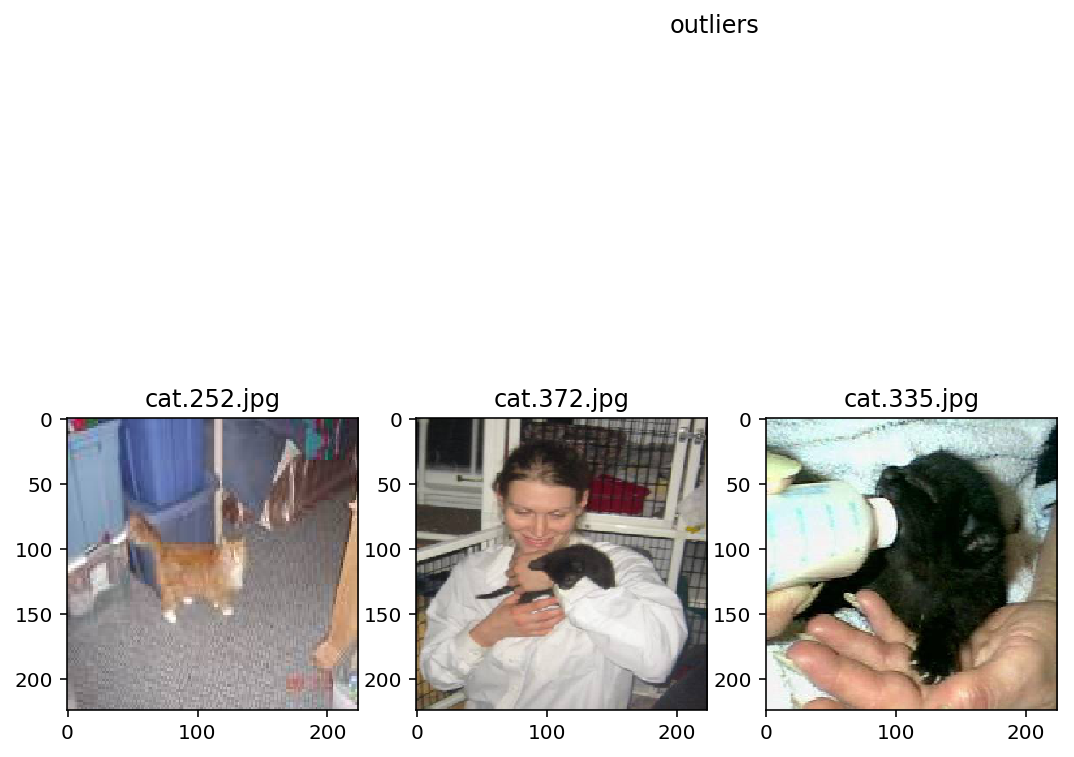

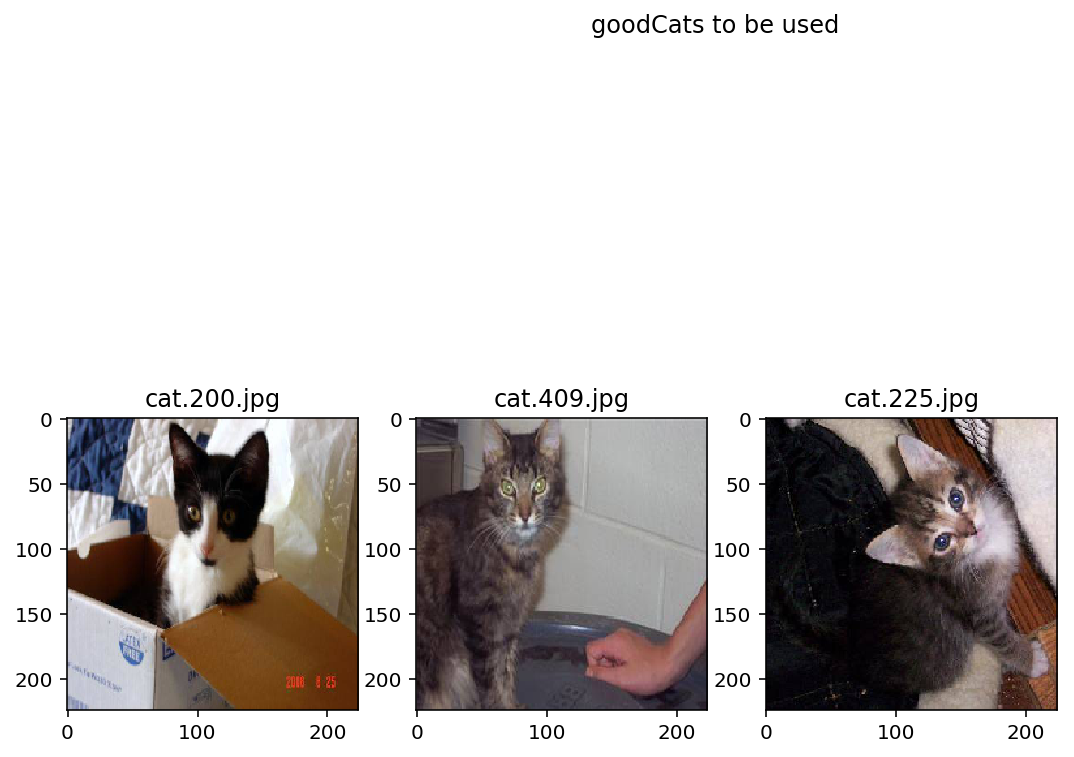

In [104]:
dogOutliersIndex = [int(outlier[outlier.find('.')+1:outlier.rfind('.')]) for outlier in outliers if 'dog' in outlier]
catOutliersIndex = [int(outlier[outlier.find('.')+1:outlier.rfind('.')])  for outlier in outliers if 'cat' in outlier]

goodDogsIndex = []
goodCatsIndex = []

for outlier in dogOutliersIndex:
    goodDogIndex = getAGoodOne(sampleNumber, dogOutliersIndex)
    goodDogsIndex.append(goodDogIndex)

for outlier in catOutliersIndex:
    goodCatIndex = getAGoodOne(sampleNumber, catOutliersIndex)
    goodCatsIndex.append(goodCatIndex)

print (dogOutliersIndex)
print (goodDogsIndex)
print (catOutliersIndex)
print (goodCatsIndex)

goodDogs = ['dog.%d.jpg' %goodDogIndex for goodDogIndex in goodDogsIndex]
goodCats = ['cat.%d.jpg' %goodCatIndex for goodCatIndex in goodCatsIndex]

print (goodDogs)
print (goodCats)

showOutliers(outliers, 'outliers')
showOutliers(goodDogs, 'goodDogs to be used')
showOutliers(goodCats, 'goodCats to be used')

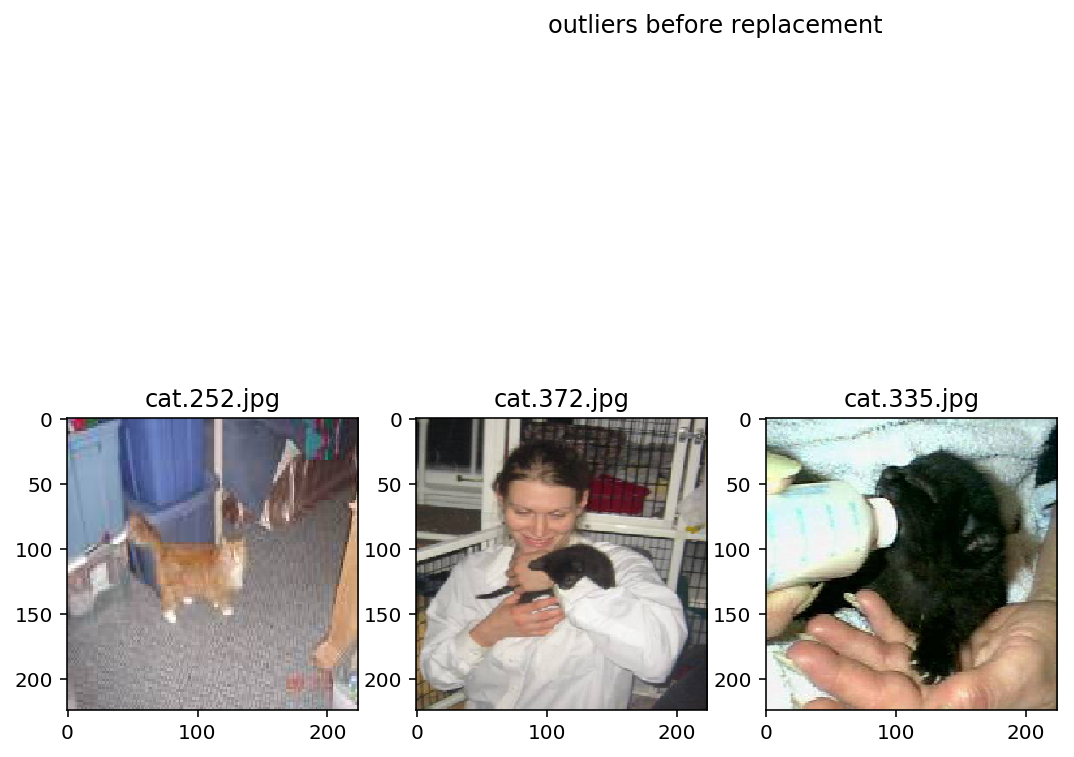

In [105]:
showOutliers(outliers, 'outliers before replacement')

In [106]:
import shutil

def mkdirIfNotExist(dirname):
    if not os.path.exists(dirname):
        os.mkdir(dirname)  

outliersPath = 'train/outliers'
mkdirIfNotExist(outliersPath)

for index in range(len(dogOutliersIndex)):
    outlierDogFilename = 'train/dog.%d.jpg' %dogOutliersIndex[index]
    if os.path.exists(outlierDogFilename):
        shutil.move(outlierDogFilename, outliersPath)
    
    goodDogFilename = 'train/dog.%d.jpg' %goodDogsIndex[index]
    shutil.copy(goodDogFilename, outlierDogFilename)
    print(goodDogFilename)


In [107]:
for index in range(len(catOutliersIndex)):
    outlierCatFilename = 'train/cat.%d.jpg' %catOutliersIndex[index]
    if os.path.exists(outlierCatFilename):
        shutil.move(outlierCatFilename, outliersPath)
    
    goodCatFilename = 'train/cat.%d.jpg' %goodCatsIndex[index]
    shutil.copy(goodCatFilename, outlierCatFilename)
    print(goodCatFilename)

train/cat.200.jpg
train/cat.409.jpg
train/cat.225.jpg


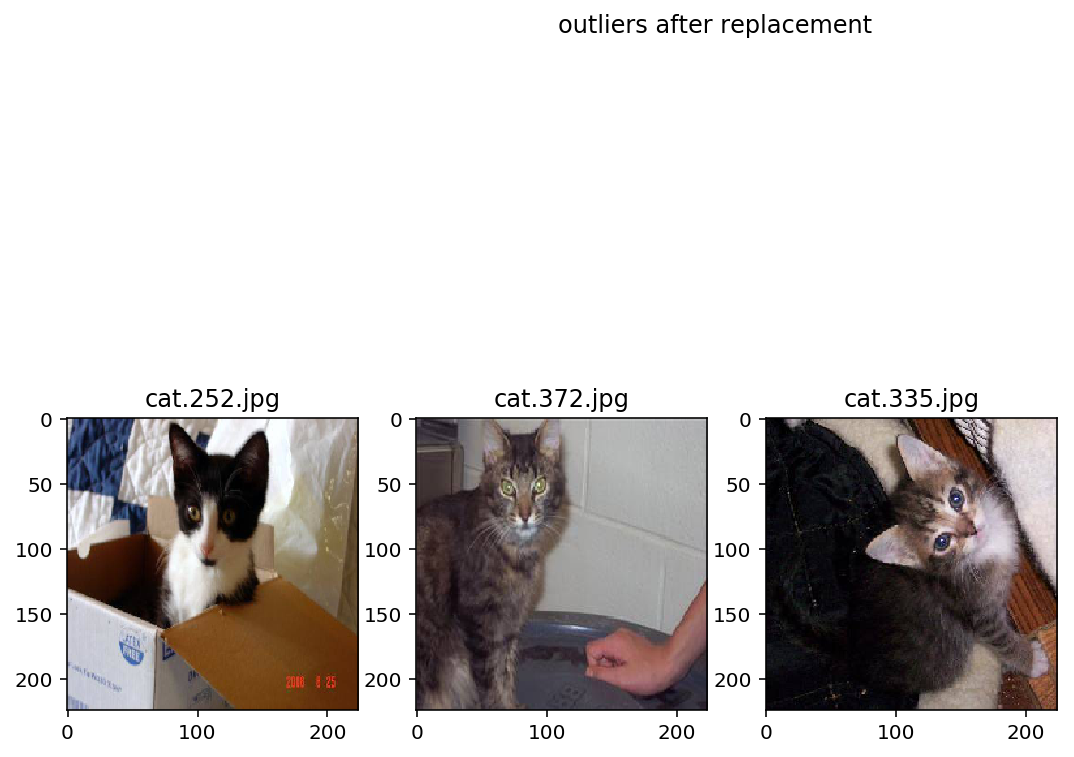

In [108]:
showOutliers(outliers, 'outliers after replacement')

In [86]:
print('done')

done
